In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Aktivációs függvény:

def sigmoid(x):
  return 1/(1+np.exp(-x))

#===============================================================================

# Az aktivációs függvény deriváltja:

def der_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

#===============================================================================

# Loss function:

def loss(Y_true, Y_calc):
  return np.power(Y_true-Y_calc,2).mean()

In [3]:
# Random súlyok:

w1=np.random.normal()
w2=np.random.normal()
w3=np.random.normal()
w4=np.random.normal()
w5=np.random.normal()
w6=np.random.normal()
w=np.array([w1,w2,w3,w4,w5,w6])

#===============================================================================

# Random eltolósúlyok:

b1=np.random.normal()
b2=np.random.normal()
b3=np.random.normal()

b=np.array([b1,b2,b3])

In [4]:
w,b

(array([-0.06265698, -0.24832986,  1.85348376,  0.82294388, -1.28483101,
        -2.14026683]), array([ 0.2683314 , -0.55112905,  1.43231803]))

In [5]:
# A háló kimenetének számítása:

def calc_output(xn,wn,bn):
    hn1 = sigmoid(wn[0] * xn[0] + wn[1] * xn[1] + bn[0])
    hn2 = sigmoid(wn[2] * xn[0] + wn[3] * xn[1] + bn[1])
    yn_calc = sigmoid(wn[4] * hn1 + wn[5] * hn2 + bn[2])
    return yn_calc

In [6]:
# Tanító adatok - bemenetek:
Xs = np.array([
  [-2, -1],
  [25, 6],
  [17, 4],
  [-15, -6],
  [20,5],
  [-16,-2],
  [16,8],
  [-9,-3]
])

#===============================================================================

#Tanító adatok - valós kimenetek:

Y_trues = np.array([
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1
])

In [7]:
def train(Xs,Y_trues,w,b):
    
    learn_rate = 0.1
    num_train = 1000
    Ns=[]
    Cs=[]

    for n in range(num_train):
      for x, y_true in zip(Xs, Y_trues):

      # A rejtett réteg neuronjai:

        sum_hn1 = w[0] * x[0] + w[1] * x[1] + b[0]
        hn1 = sigmoid(sum_hn1)

        #=======================================================================

        sum_hn2 = w[2] * x[0] + w[3] * x[1] + b[1]
        hn2 = sigmoid(sum_hn2)

        #=======================================================================

    # A kimeneti réteg neuronja:

        sum_y = w[4] * hn1 + w[5] * hn2 + b[2]
        y_calc = sigmoid(sum_y)

        #=======================================================================

    # Parciális deriváltak:

        dL_dycalc = -2 * (y_true - y_calc)

        #=======================================================================

        dycalc_dw5 = hn1 * der_sigmoid(sum_y)
        dycalc_dw6 = hn2 * der_sigmoid(sum_y)
        dycalc_db3 = der_sigmoid(sum_y)

        #=======================================================================

        dycalc_dhn1 = w[4] * der_sigmoid(sum_y)
        dycalc_dhn2 = w[5] * der_sigmoid(sum_y)

        #=======================================================================

        dhn1_dw1 = x[0] * der_sigmoid(sum_hn1)
        dhn1_dw2 = x[1] * der_sigmoid(sum_hn1)
        dhn1_db1 = der_sigmoid(sum_hn1)

        #=======================================================================

        dhn2_dw3 = x[0] * der_sigmoid(sum_hn2)
        dhn2_dw4 = x[1] * der_sigmoid(sum_hn2)
        dhn2_db2 = der_sigmoid(sum_hn2)

        #=======================================================================

    # Új értékek:

        w[0] -= learn_rate * dL_dycalc * dycalc_dhn1 * dhn1_dw1
        w[1] -= learn_rate * dL_dycalc * dycalc_dhn1 * dhn1_dw2
        b[0] -= learn_rate * dL_dycalc * dycalc_dhn1 * dhn1_db1

        #=======================================================================

        w[2] -= learn_rate * dL_dycalc * dycalc_dhn2 * dhn2_dw3
        w[3] -= learn_rate * dL_dycalc * dycalc_dhn2 * dhn2_dw4
        b[1] -= learn_rate * dL_dycalc * dycalc_dhn2 * dhn2_db2

        #=======================================================================

        w[4] -= learn_rate * dL_dycalc * dycalc_dw5
        w[5] -= learn_rate * dL_dycalc * dycalc_dw6
        b[2] -= learn_rate * dL_dycalc * dycalc_db3

        #=======================================================================

    # Loss function aktuális értéke:

      if (n+1) % 10 == 0:
        y_calcs = np.apply_along_axis(calc_output, 1, Xs, w, b)
        act_loss = loss(Y_trues, y_calcs)
        print("%d. iteráció: C = %.6f" % (n + 1, act_loss))
        Ns.append(n)
        Cs.append(act_loss)
    

    plt.rcParams["figure.figsize"]=[20,10]
    plt.scatter(Ns,Cs,10)

10. iteráció: C = 0.026362
20. iteráció: C = 0.021821
30. iteráció: C = 0.018675
40. iteráció: C = 0.016291
50. iteráció: C = 0.014415
60. iteráció: C = 0.012902
70. iteráció: C = 0.011660
80. iteráció: C = 0.010622
90. iteráció: C = 0.009744
100. iteráció: C = 0.008993
110. iteráció: C = 0.008344
120. iteráció: C = 0.007778
130. iteráció: C = 0.007280
140. iteráció: C = 0.006840
150. iteráció: C = 0.006447
160. iteráció: C = 0.006095
170. iteráció: C = 0.005778
180. iteráció: C = 0.005491
190. iteráció: C = 0.005230
200. iteráció: C = 0.004992
210. iteráció: C = 0.004774
220. iteráció: C = 0.004574
230. iteráció: C = 0.004389
240. iteráció: C = 0.004217
250. iteráció: C = 0.004059
260. iteráció: C = 0.003911
270. iteráció: C = 0.003774
280. iteráció: C = 0.003645
290. iteráció: C = 0.003525
300. iteráció: C = 0.003412
310. iteráció: C = 0.003306
320. iteráció: C = 0.003206
330. iteráció: C = 0.003112
340. iteráció: C = 0.003023
350. iteráció: C = 0.002938
360. iteráció: C = 0.002859
3

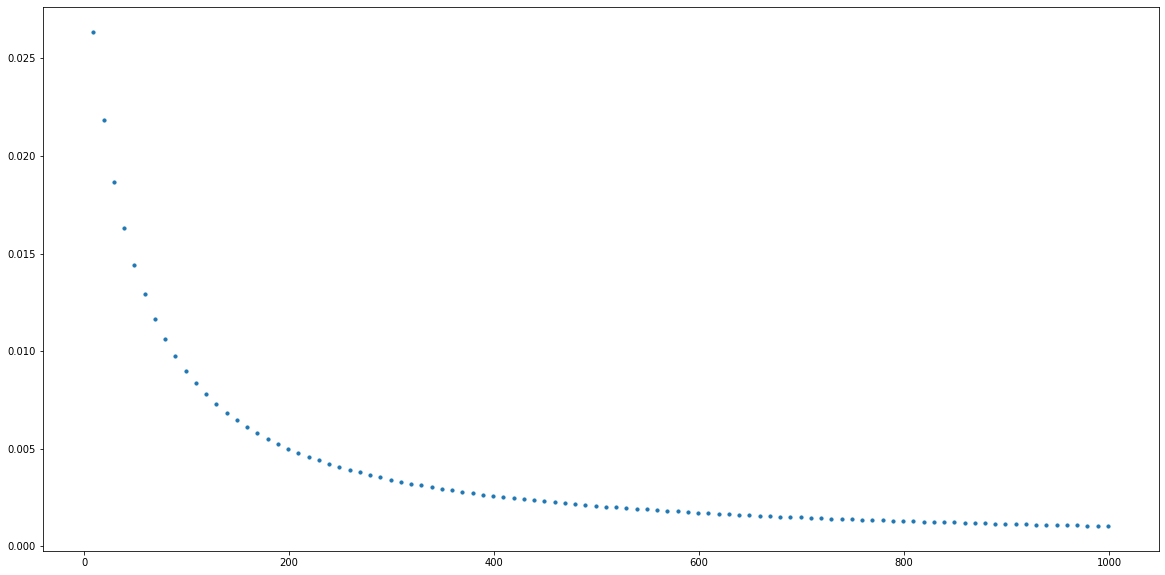

In [8]:
# Háló tanítása:

train(Xs, Y_trues, w, b)

In [9]:
# Teszt:

test_data1 = np.array([-3, -1])
test_data2 = np.array([8, 3])

prediction1 = calc_output(test_data1, w, b)
prediction2 = calc_output(test_data2, w, b)

print("'Minél inkább 0, annál inkább T-Rex'")
print("Eredmény az első tesztadatra: %.6f" % prediction1)
print("Eredmény a második tesztadatra: %.6f" % prediction2)

'Minél inkább 0, annál inkább T-Rex'
Eredmény az első tesztadatra: 0.962762
Eredmény a második tesztadatra: 0.026177


In [10]:
w,b

(array([ 1.10061625,  0.25314363,  1.90281139,  0.84760769, -2.8757203 ,
        -4.06774803]), array([-0.11923378, -0.57579285,  3.32688087]))